In [39]:
print(__doc__)
import numpy as np
import pandas as pd
import scipy
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import seaborn as sns
%matplotlib inline

Automatically created module for IPython interactive environment


In [40]:
#Parsing the dataset and seperating input features and output label as required in the question

In [41]:
column_names = ['Input feature1','Input feature2','Input feature3','Label1','Label2','Label3','Label4']

In [54]:
input_data = pd.read_csv("p4p5.csv",names = column_names)
input_features = input_data.iloc[:,0:3]

In [43]:
label_feature = input_data.iloc[:,3:4]

In [44]:
input_feature_array = np.array(input_features)
label_feature_array = np.array(label_feature)

In [56]:
#Splitting the data into train and test

X_train,X_test,y_train,y_test = train_test_split(input_feature_array,label_feature_array,test_size = 0.90,random_state = 42)

In [60]:
y_train.shape

(10000, 1)

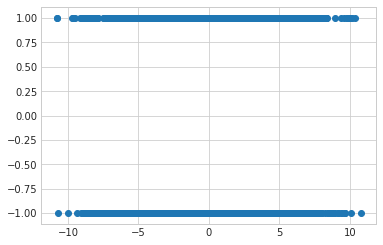

In [65]:
plt.scatter(X_train[:,0:1],y_train)
plt.show()

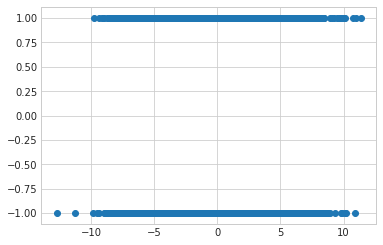

In [66]:
plt.scatter(X_train[:,1:2],y_train)
plt.show()

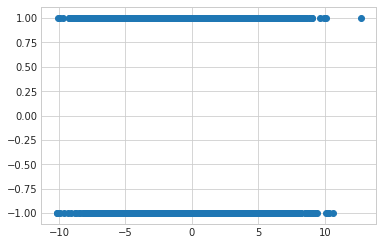

In [67]:
plt.scatter(X_train[:,2:3],y_train)
plt.show()

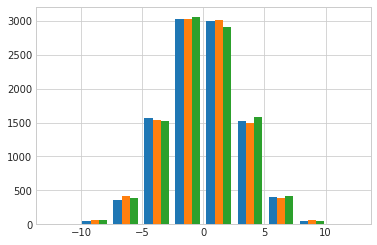

In [72]:
plt.hist(X_train)
plt.show()

In [73]:
from sklearn.linear_model import LogisticRegression 

In [74]:
logisticReg = LogisticRegression()

In [76]:
logisticReg.fit(X_train,np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
print(logisticReg.predict(X_test[0:5000]))

[-1. -1. -1. ... -1. -1.  1.]


In [89]:
score = logisticReg.score(X_test[0:5000],y_test[0:5000])
print(score)

0.4966


In [27]:
# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                         n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
#     """
#     Generate a simple plot of the test and training learning curve.

#     Parameters
#     ----------
#     estimator : object type that implements the "fit" and "predict" methods
#         An object of that type which is cloned for each validation.

#     title : string
#         Title for the chart.

#     X : array-like, shape (n_samples, n_features)
#         Training vector, where n_samples is the number of samples and
#         n_features is the number of features.

#     y : array-like, shape (n_samples) or (n_samples, n_features), optional
#         Target relative to X for classification or regression;
#         None for unsupervised learning.

#     ylim : tuple, shape (ymin, ymax), optional
#         Defines minimum and maximum yvalues plotted.

#     cv : int, cross-validation generator or an iterable, optional
#         Determines the cross-validation splitting strategy.
#         Possible inputs for cv are:
#           - None, to use the default 3-fold cross-validation,
#           - integer, to specify the number of folds.
#           - An object to be used as a cross-validation generator.
#           - An iterable yielding train/test splits.

#         For integer/None inputs, if ``y`` is binary or multiclass,
#         :class:`StratifiedKFold` used. If the estimator is not a classifier
#         or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

#         Refer :ref:`User Guide <cross_validation>` for the various
#         cross-validators that can be used here.

#     n_jobs : integer, optional
#         Number of jobs to run in parallel (default 1).
#     """
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt
# Learning curve
def plot_learning_curve(X, Y, model, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/sagar/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

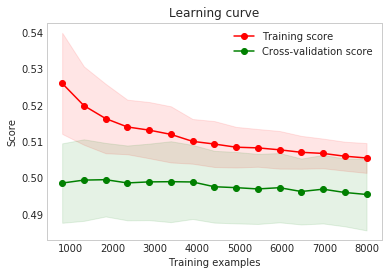

In [93]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
logreg  = LogisticRegression(C=1000)
train_size=np.linspace(.1, 1.0, 15)
plot_learning_curve(X_train[0:10000], np.ravel(y_train[0:10000]), logreg, cv, train_size)

KeyboardInterrupt: 

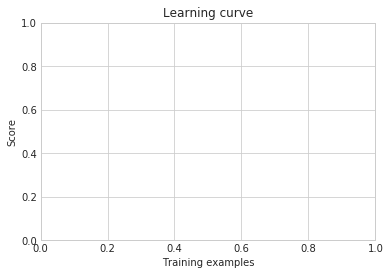

In [94]:
#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
estimator = SVC(C=1, probability=True)
#plot_learning_curve(estimator, title, X_train, np.ravel(y_train), (0.7, 1.01), cv=cv, n_jobs=4)
train_size=np.linspace(.1, 1.0, 15)
plot_learning_curve(X_train[0:10000], np.ravel(y_train[0:10000]), estimator, cv, train_size)
    
plt.show()

In [10]:
def test_data_evaluation(model=None):
    predictions = model.predict(X_test)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(y_test) #Accuracy as a percentage
    return accuracy


In [11]:
kernels = ('linear','poly','rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, np.ravel(y_train))
    acc = test_data_evaluation(model)
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc, kernel))

49.74 % accuracy obtained with kernel = linear
50.233333333333334 % accuracy obtained with kernel = poly
50.723333333333336 % accuracy obtained with kernel = rbf


In [13]:
#Train SVMs with different kernels
svc = svm.SVC(kernel='linear').fit(X_train, np.ravel(y_train))
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, np.ravel(y_train))
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, np.ravel(y_train))

In [1]:
#Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = input_feature_array[:, 0].min() - 1, input_feature_array[:, 0].max() + 1
y_min, y_max = input_feature_array[:, 1].min() - 1, input_feature_array[:, 1].max() + 1
z_min, z_max = input_feature_array[:, 2].min() - 1, input_feature_array[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h),
                     np.arange(z_min, z_max, h))

NameError: name 'input_feature_array' is not defined

In [16]:
#Define title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(i)

    Z = clf.predict(np.c_[np.ravel(xx), np.ravel(yy), np.ravel(zz)])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(input_feature_array[:, 0], input_feature_array[:, 1], c=y, cmap=plt.cm.ocean)
    plt.xlabel('Input feature1')
    plt.ylabel('Input feature2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

ValueError: X.shape[1] = 2 should be equal to 3, the number of features at training time

In [ ]:
plt.show()